<a href="https://colab.research.google.com/github/merkington/horror/blob/main/csvcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

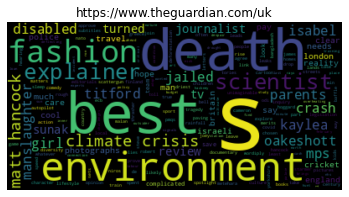

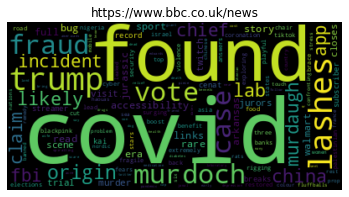

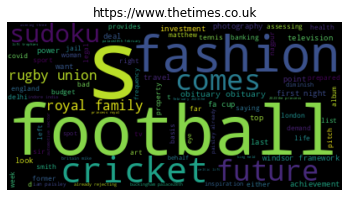

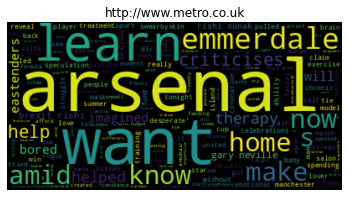

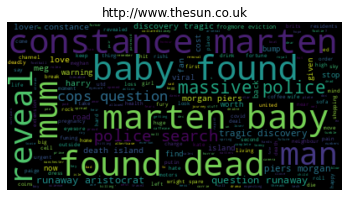

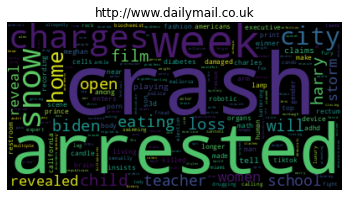

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
# Check if the scraped_data.csv file exists, and create it if it doesn't
if not os.path.exists('scraped_data.csv'):
    with open('scraped_data.csv', 'w') as f:
        f.write('source,date,tag,line,content\n')
# Get today's date
today = datetime.datetime.now().date()


# List of URLs to scrape
url_list = ['https://www.theguardian.com/uk', 'https://www.bbc.co.uk/news', 'https://www.thetimes.co.uk',
            'http://www.metro.co.uk', "http://www.thesun.co.uk", "http://www.dailymail.co.uk"]

# Loop through the URLs and scrape each one
for url in url_list:
    # Send a GET request to the specified URL
    response = requests.get(url)

    # Parse the HTML content of the response using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Read the banned words from a text file
    with open('banned.txt', 'r') as f:
        banned_words = f.read().splitlines()

    # Extract all text content from the specified HTML tags
    data = []
    for tag in ['h1', 'h2', 'h3', 'p']:
        for index, element in enumerate(soup.find_all(tag)):
            # Exclude specific words from the extracted text
            element_text = element.get_text().strip().lower()
            if not any(word in element_text for word in banned_words):
                data.append([url, datetime.datetime.now(), tag, index, element_text])

    # Create a pandas DataFrame from the scraped data
    df = pd.DataFrame(data, columns=['source', 'date', 'tag', 'line', 'content'])

    # Save the DataFrame to a CSV file (in append mode)
    df.to_csv('scraped_data.csv', mode='a', header=not pd.read_csv('scraped_data.csv').empty, index=False)
    # Filter the DataFrame to only include today's date
    # Filter the DataFrame to only include today's date
    today_df = df[pd.to_datetime(df['date']).dt.date == today]


    
    # Generate a wordcloud from the content of the scraped data
    content = " ".join(today_df['content'])
    wordcloud = WordCloud(background_color='black').generate(content)

    # Display the wordcloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(url)
    plt.show()
